In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
np.set_printoptions(threshold=200)

In [2]:
df = pd.read_csv("complaints_25Nov21.csv")

In [3]:
df.shape

(207260, 18)

In [4]:
207260*0.2

41452.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207260 entries, 0 to 207259
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 207260 non-null  object
 1   Product                       207260 non-null  object
 2   Sub-product                   164245 non-null  object
 3   Issue                         207260 non-null  object
 4   Sub-issue                     10347 non-null   object
 5   Consumer complaint narrative  29391 non-null   object
 6   Company public response       58458 non-null   object
 7   Company                       207260 non-null  object
 8   State                         205066 non-null  object
 9   ZIP code                      197974 non-null  object
 10  Tags                          28265 non-null   object
 11  Consumer consent provided?    51313 non-null   object
 12  Submitted via                 207260 non-null  object
 13 

In [6]:
df.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,NaN,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,No,1337613
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,VA,22406,Servicemember,NaN,Phone,2013-04-30,Closed with explanation,Yes,Yes,393900
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2013-05-31,Closed with explanation,Yes,No,418647
5,2017-01-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2017-02-02,Closed with explanation,Yes,No,2317362
6,2014-02-21,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,JPMORGAN CHASE & CO.,CA,92592,NaN,NaN,Web,2014-02-20,Closed with explanation,Yes,No,725150
7,2016-10-14,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,MD,21222,NaN,NaN,Phone,2016-10-14,Closed with explanation,Yes,No,2161603
8,2014-01-15,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,VA,228XX,Older American,NaN,Phone,2014-01-22,Closed with explanation,Yes,Yes,670395
9,2016-09-19,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,"Mortgage Fraud, defective title, defective mor...",Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",MN,NaN,NaN,Consent provided,Web,2016-10-05,Closed with explanation,Yes,Yes,2118743


In [7]:
X = df[['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via',  'Company response to consumer', 'Timely response?']]

In [8]:
X.sample(10)

,Product,Sub-product,Issue,State,Tags,Submitted via,Company response to consumer,Timely response?
79139,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",WI,NaN,Web,Closed with explanation,Yes
176594,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",GA,NaN,Web,Closed with explanation,Yes
92740,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",IN,NaN,Phone,Closed with explanation,Yes
54509,Mortgage,Home equity loan or line of credit,"Loan modification,collection,foreclosure",MA,Older American,Web,Closed with explanation,Yes
156114,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",IN,NaN,Phone,Closed with explanation,Yes
83625,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",MI,NaN,Web,Closed with explanation,Yes
137501,Bank account or service,Checking account,Deposits and withdrawals,CA,NaN,Web,Closed with explanation,Yes
175830,Bank account or service,Checking account,"Account opening, closing, or management",GA,NaN,Web,Closed with explanation,Yes
19912,Bank account or service,Checking account,"Account opening, closing, or management",CA,NaN,Referral,Closed with monetary relief,Yes
26624,Credit card,NaN,Delinquent account,MO,NaN,Referral,Closed with explanation,Yes


In [9]:
X = pd.get_dummies(X)

In [10]:
X.sample(10)

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Timely response?_No,Timely response?_Yes
1090,False,False,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True
129817,False,False,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True
65235,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
173362,False,True,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
15510,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
144282,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
204541,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
177243,False,False,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
171171,False,False,False,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
136286,False,False,False,False,False,False,False,False,False,True,...,True,False,True,False,False,False,False,False,False,True


In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['Consumer disputed?'])

In [12]:
y[:100]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [13]:
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state = 123)

check the proportion of complaints in the training data set to see if it's less than 30%. If it is, then we need to balance the dataset.

In [13]:
(np.count_nonzero(y_train==1))/y_train.size

0.21684719675769565

In [14]:
X_test1.shape

(41452, 231)

We need to use random undersampling to balance the dataset.

In [15]:
import imblearn
undersampler = imblearn.under_sampling.RandomUnderSampler(random_state=123)
X_train, y_train = undersampler.fit_resample(X, y)

In [16]:
X_train.shape
y_train.shape

(89806,)

Now let's split the train-test dataset on top of it and check the proportion again.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state = 123)

In [18]:
(np.count_nonzero(y_train==1))/y_train.size

0.5004036523578865

In [19]:
X_test.sample(10)

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Timely response?_No,Timely response?_Yes
127312,False,False,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True
176719,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
11141,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
106249,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
181100,True,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
166549,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
56794,False,False,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True
139517,False,False,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True
132778,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
10987,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [20]:
X_test.shape

(17962, 231)

Now let's train the prediction model.

In [21]:
from xgboost import XGBClassifier

In [22]:
model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay
from sklearn import metrics

              precision    recall  f1-score   support

           0       0.59      0.52      0.55      9010
           1       0.57      0.63      0.60      8952

    accuracy                           0.57     17962
   macro avg       0.58      0.57      0.57     17962
weighted avg       0.58      0.57      0.57     17962



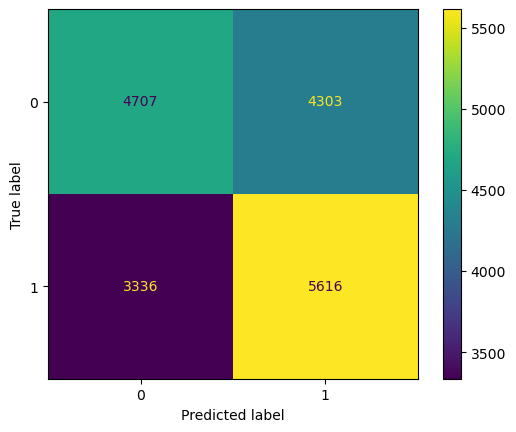

In [25]:
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test);

The confusion matrix above applied the test set being undersampled. Now let's apply the model to the original test set and check the result.

In [26]:
original_prediction = model_xgb.predict(X_test1)

              precision    recall  f1-score   support

           0       0.85      0.53      0.65     32504
           1       0.28      0.65      0.39      8948

    accuracy                           0.56     41452
   macro avg       0.56      0.59      0.52     41452
weighted avg       0.72      0.56      0.60     41452



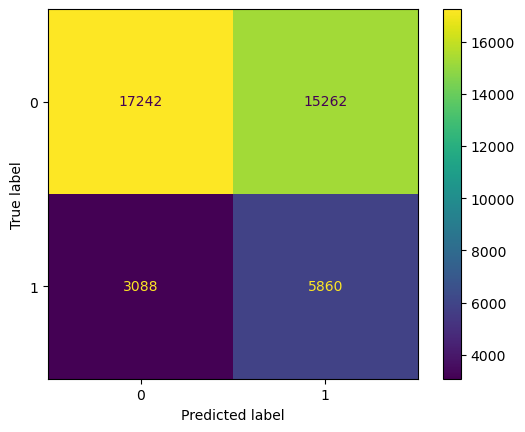

In [27]:
print(classification_report(y_true = y_test1, y_pred = original_prediction))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test1, y_test1);

Let's calculate the total cost if we do not apply the prediction model.
formula: 100*non-disputed+600*disputed

In [28]:
100*(17242+15262)+600*(3088+5860)

8619200

Now let's calculate the total cost after apply the prediction model

In [29]:
17242*100+15262*190+3088*600+5860*190

7590180

Now we need to find the correct threshold and the lowest total cost. 

Confusion Matrix : 
 [[   70 32434]
 [    0  8948]]


7869580

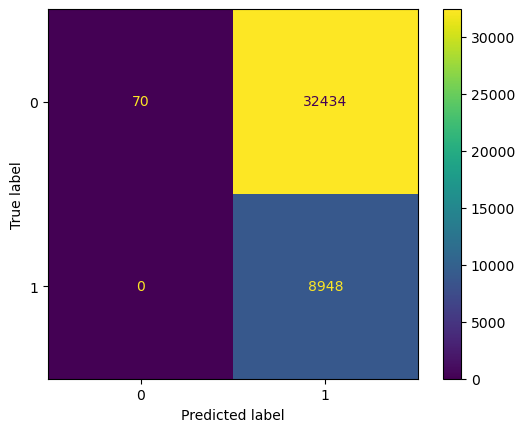

In [45]:
# Set threshold 
threshold = 0.1

# Create predictions.  Note that predictions give us probabilities, not classes!
pred_prob = model_xgb.predict_proba(X_test1)

# We drop the probabilities for class 0, and keep just the second column
pred_prob = pred_prob[:,1]

# Convert probabilities to 1s and 0s based on threshold
pred = (pred_prob>threshold).astype(int)

# confusion matrix
cm = confusion_matrix(y_test1, pred)
print ("Confusion Matrix : \n", cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# caculate total cost
TN,FD,FN,TD = cm.ravel()
100*TN+190*FD+600*FN+190*TD

Confusion Matrix : 
 [[22082 10422]
 [ 4475  4473]]


7723250

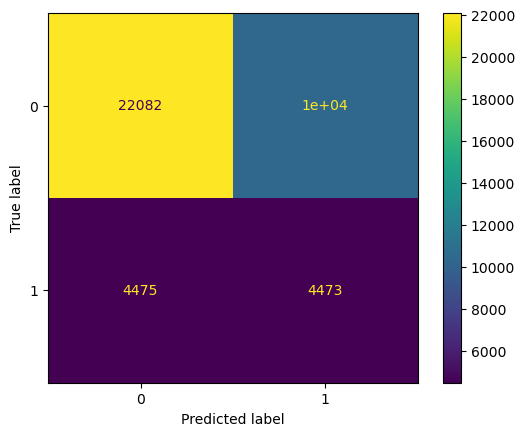

In [46]:
# Set threshold 
threshold = 0.54

# Create predictions.  Note that predictions give us probabilities, not classes!
pred_prob = model_xgb.predict_proba(X_test1)

# We drop the probabilities for class 0, and keep just the second column
pred_prob = pred_prob[:,1]

# Convert probabilities to 1s and 0s based on threshold
pred = (pred_prob>threshold).astype(int)

# confusion matrix
cm = confusion_matrix(y_test1, pred)
print ("Confusion Matrix : \n", cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# caculate total cost
TN,FD,FN,TD = cm.ravel()
100*TN+190*FD+600*FN+190*TD

Confusion Matrix : 
 [[17242 15262]
 [ 3088  5860]]


7590180

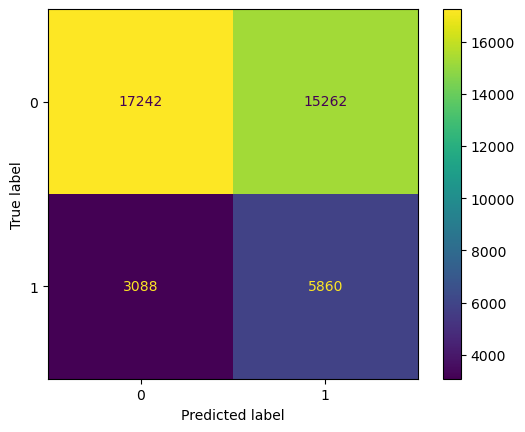

In [47]:
# Set threshold 
threshold = 0.5

# Create predictions.  Note that predictions give us probabilities, not classes!
pred_prob = model_xgb.predict_proba(X_test1)

# We drop the probabilities for class 0, and keep just the second column
pred_prob = pred_prob[:,1]

# Convert probabilities to 1s and 0s based on threshold
pred = (pred_prob>threshold).astype(int)

# confusion matrix
cm = confusion_matrix(y_test1, pred)
print ("Confusion Matrix : \n", cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# caculate total cost
TN,FD,FN,TD = cm.ravel()
100*TN+190*FD+600*FN+190*TD

Confusion Matrix : 
 [[12170 20334]
 [ 1811  7137]]


7523090

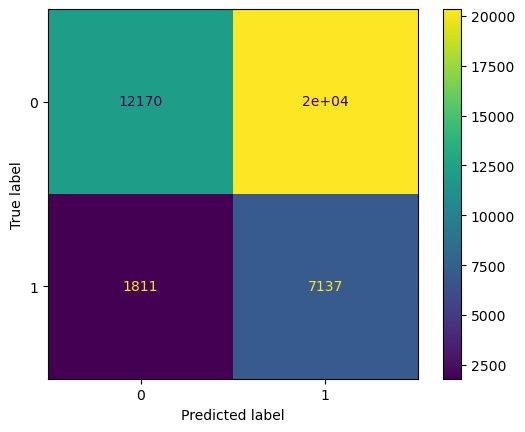

In [48]:
# Set threshold 
threshold = 0.46

# Create predictions.  Note that predictions give us probabilities, not classes!
pred_prob = model_xgb.predict_proba(X_test1)

# We drop the probabilities for class 0, and keep just the second column
pred_prob = pred_prob[:,1]

# Convert probabilities to 1s and 0s based on threshold
pred = (pred_prob>threshold).astype(int)

# confusion matrix
cm = confusion_matrix(y_test1, pred)
print ("Confusion Matrix : \n", cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# caculate total cost
TN,FD,FN,TD = cm.ravel()
100*TN+190*FD+600*FN+190*TD